Jacob Kickbush, Adam Foster
Team 4 Data Analysis
Poster Writeup

Introduction:

Our study focuses on the Arabica species of coffee bean, and how data about it's creation correlates to the qualities of the bean, such as flavor and acidity. Our idea for this study is to look at one of our categorical variables, such as Country of Origin, and compare their quality variables to each other, to show which country produces the best kind of beans. This was the main focus of our analysis.

Data Description:

Data origin: https://github.com/jldbc/coffee-quality-database

Our data comes from a cleaned csv from this github link. It contains
review from The Coffee Quality Institute's trained reviewers. We dropped any columns that were unnecessary for 
our analysis since they would just clutter our dataset, and removed any rows that had any missing values as we already had over 1300 records, so were not worried about the quantity of the records especially with how clustered together the values were. 

Rows: 1312 before dropping na 
      905 after dropping na
Columns: 43 before dropping unnecessary columns 
         11 after dropping
The rows signify a coffee bean review

Column data types

Categorical Variables:

Country.of.Origin         object nominal
Describes where the bean was grown (ex. Mexico)
Variety                   object nominal
What is the variety of the bean(ex. Bourbon)
Processing.Method         object nominal
How was the bean processed (ex. Washed)
Color                     object nominal
What color is the bean (ex. Green)

Scalar Variables:
All variables rated from a 1-10 scale of quality, 1 being the worst and 10 being the best

Aroma                    float64 ratio
The smell of the coffee
Flavor                   float64 ratio
Flavor of the coffee
Aftertaste               float64 ratio
Flavor or existence of the aftertaste
Acidity                  float64 ratio
Acidity of the coffee
Balance                  float64 ratio
Overall balance of the coffee bean
Sweetness                float64 ratio
Sweetness of the coffee
Total.Cup.Points         float64 ratio
Overall estimation of the coffees' quality, weighted by the other quality variables along with other unknown factors


In [2]:
import pandas as pd

contents = pd.read_csv("arabica_data_cleaned.csv")

#3. Show the counts and percentages of NaN values in our dataset
for col in contents.columns:
    print(col)
    print("Count:", end=" ")
    print(str(contents[col].isna().sum()) + "/1312")
    print("Percentage:", end=" ")
    print((contents[col].isna().sum() / 1312) * 100)
    print()

Unnamed: 0
Count: 0/1312
Percentage: 0.0

Country of Origin
Count: 1/1312
Percentage: 0.07621951219512195

Variety
Count: 201/1312
Percentage: 15.320121951219512

Processing Method
Count: 152/1312
Percentage: 11.585365853658537

Aroma
Count: 0/1312
Percentage: 0.0

Flavor
Count: 0/1312
Percentage: 0.0

Aftertaste
Count: 0/1312
Percentage: 0.0

Acidity
Count: 0/1312
Percentage: 0.0

Body
Count: 0/1312
Percentage: 0.0

Balance
Count: 0/1312
Percentage: 0.0

Total Cup Points
Count: 0/1312
Percentage: 0.0

Color
Count: 216/1312
Percentage: 16.463414634146343



This is one of our categorical distributions, as you can see there are couple of main countries and the rest can either be lumped together into an other category or removed entirely. The other categorical distributions were similar and gave us the idea to look at how our quality variables would measure up against the different categories in our categorical variables

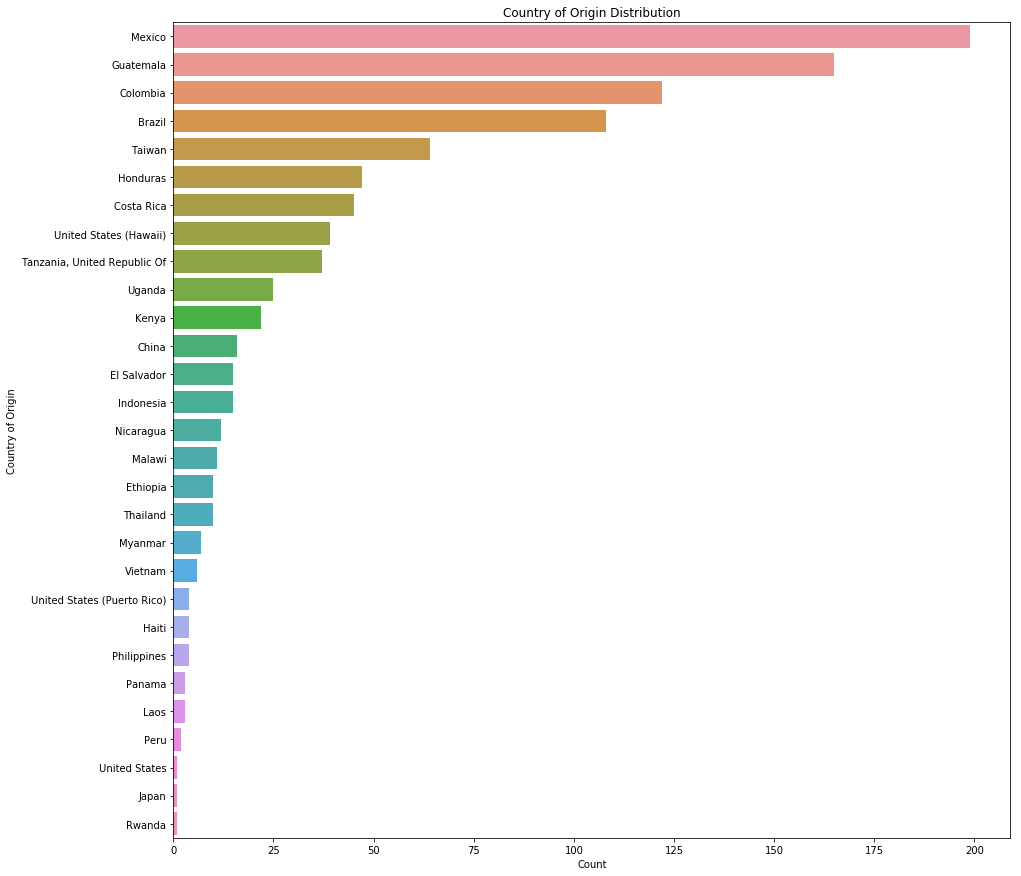

In [4]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, operator

coffee = pd.read_csv("arabica_data_cleaned.csv")
coffee = coffee.dropna()


def catGraph(colName, figWidth, figHeight):
    plt.figure(figsize = [figWidth,figHeight])

    altDict = {}

    for item in coffee[colName]:
        if item not in altDict:
            altDict[item] = 1
        else:
            altDict[item] += 1
        
    altDict = sorted(altDict.items(), key=operator.itemgetter(1), reverse=True)

    altDict = pd.DataFrame(altDict, columns=[colName, "Count"])

    sns.barplot(data = altDict, x= "Count", y = colName, orient="h").set_title(colName + " Distribution")
    
#Show an example of one of our categorical distributions
catGraph("Country of Origin", 15, 15)

The distributions of all our nominal/quality variables are normal bell shapes so there was nothing obvious to look at for further analysis

C:\Users\lil_t\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


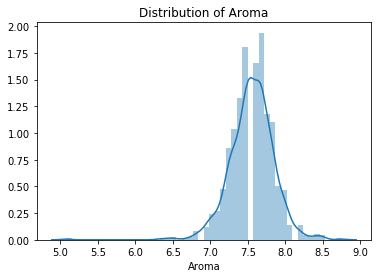

C:\Users\lil_t\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


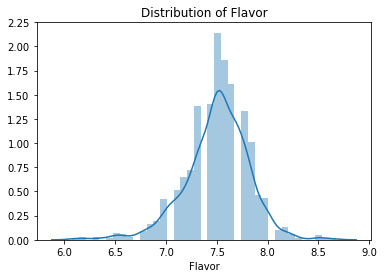

C:\Users\lil_t\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


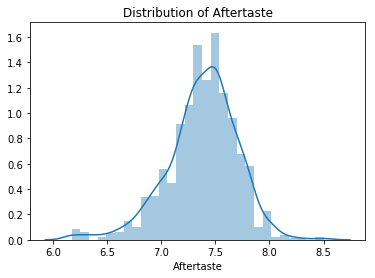

C:\Users\lil_t\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


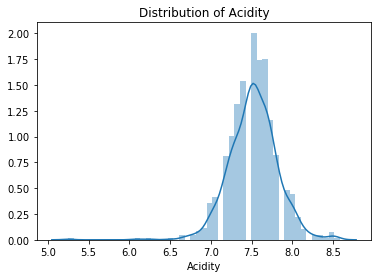

C:\Users\lil_t\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


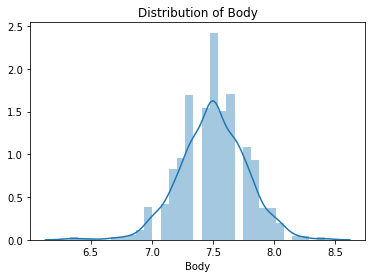

C:\Users\lil_t\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


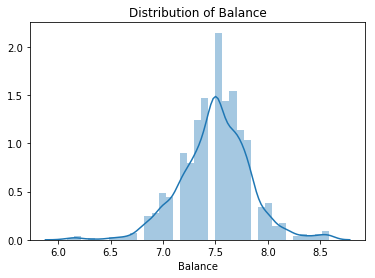

C:\Users\lil_t\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


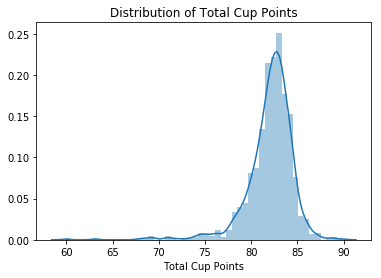

<Figure size 432x288 with 0 Axes>

In [5]:
nums = coffee.select_dtypes(include = ["int64", "float64"])

nums = nums.drop(nums.columns[0], axis = 1)

for col in nums:
    sns.distplot(coffee[col], hist = True).set_title("Distribution of " + col)
    plt.show()
    plt.clf()

Looking through our data and our visualizations so far, it appears that most of our data is fairly normalized, and there are not a lot of outliers in our more nominal data. Looking at a glance, you cannot see any very noticeable trends aside from seeing the distributions in our categorical data. This means that the differences between countries of origins, bean color, and processing method may not be extreme, and we will have to look much closer to find any possible noticeable differences. We plan on focusing on figuring out whether the different nominal data like taste, aftertaste, aroma and the like have different weightings or indications for the total cup points, along with trying to find any noticeable trends between these nominal variables and categorical information such as where they are produced, and what color the beans are. Other than with our categorical data such as Mexico being the highest producer, and green being the most common color, there are no noticeable trends as of now, so we must look further into it to find any trends that may exist, even if they have a minimal impact.

Below displays the scatter matrix that can help identify both the distributions and the clustering together of data points, showing that our data is relatively normalized

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4B5C08B00>,
      dtype=object)

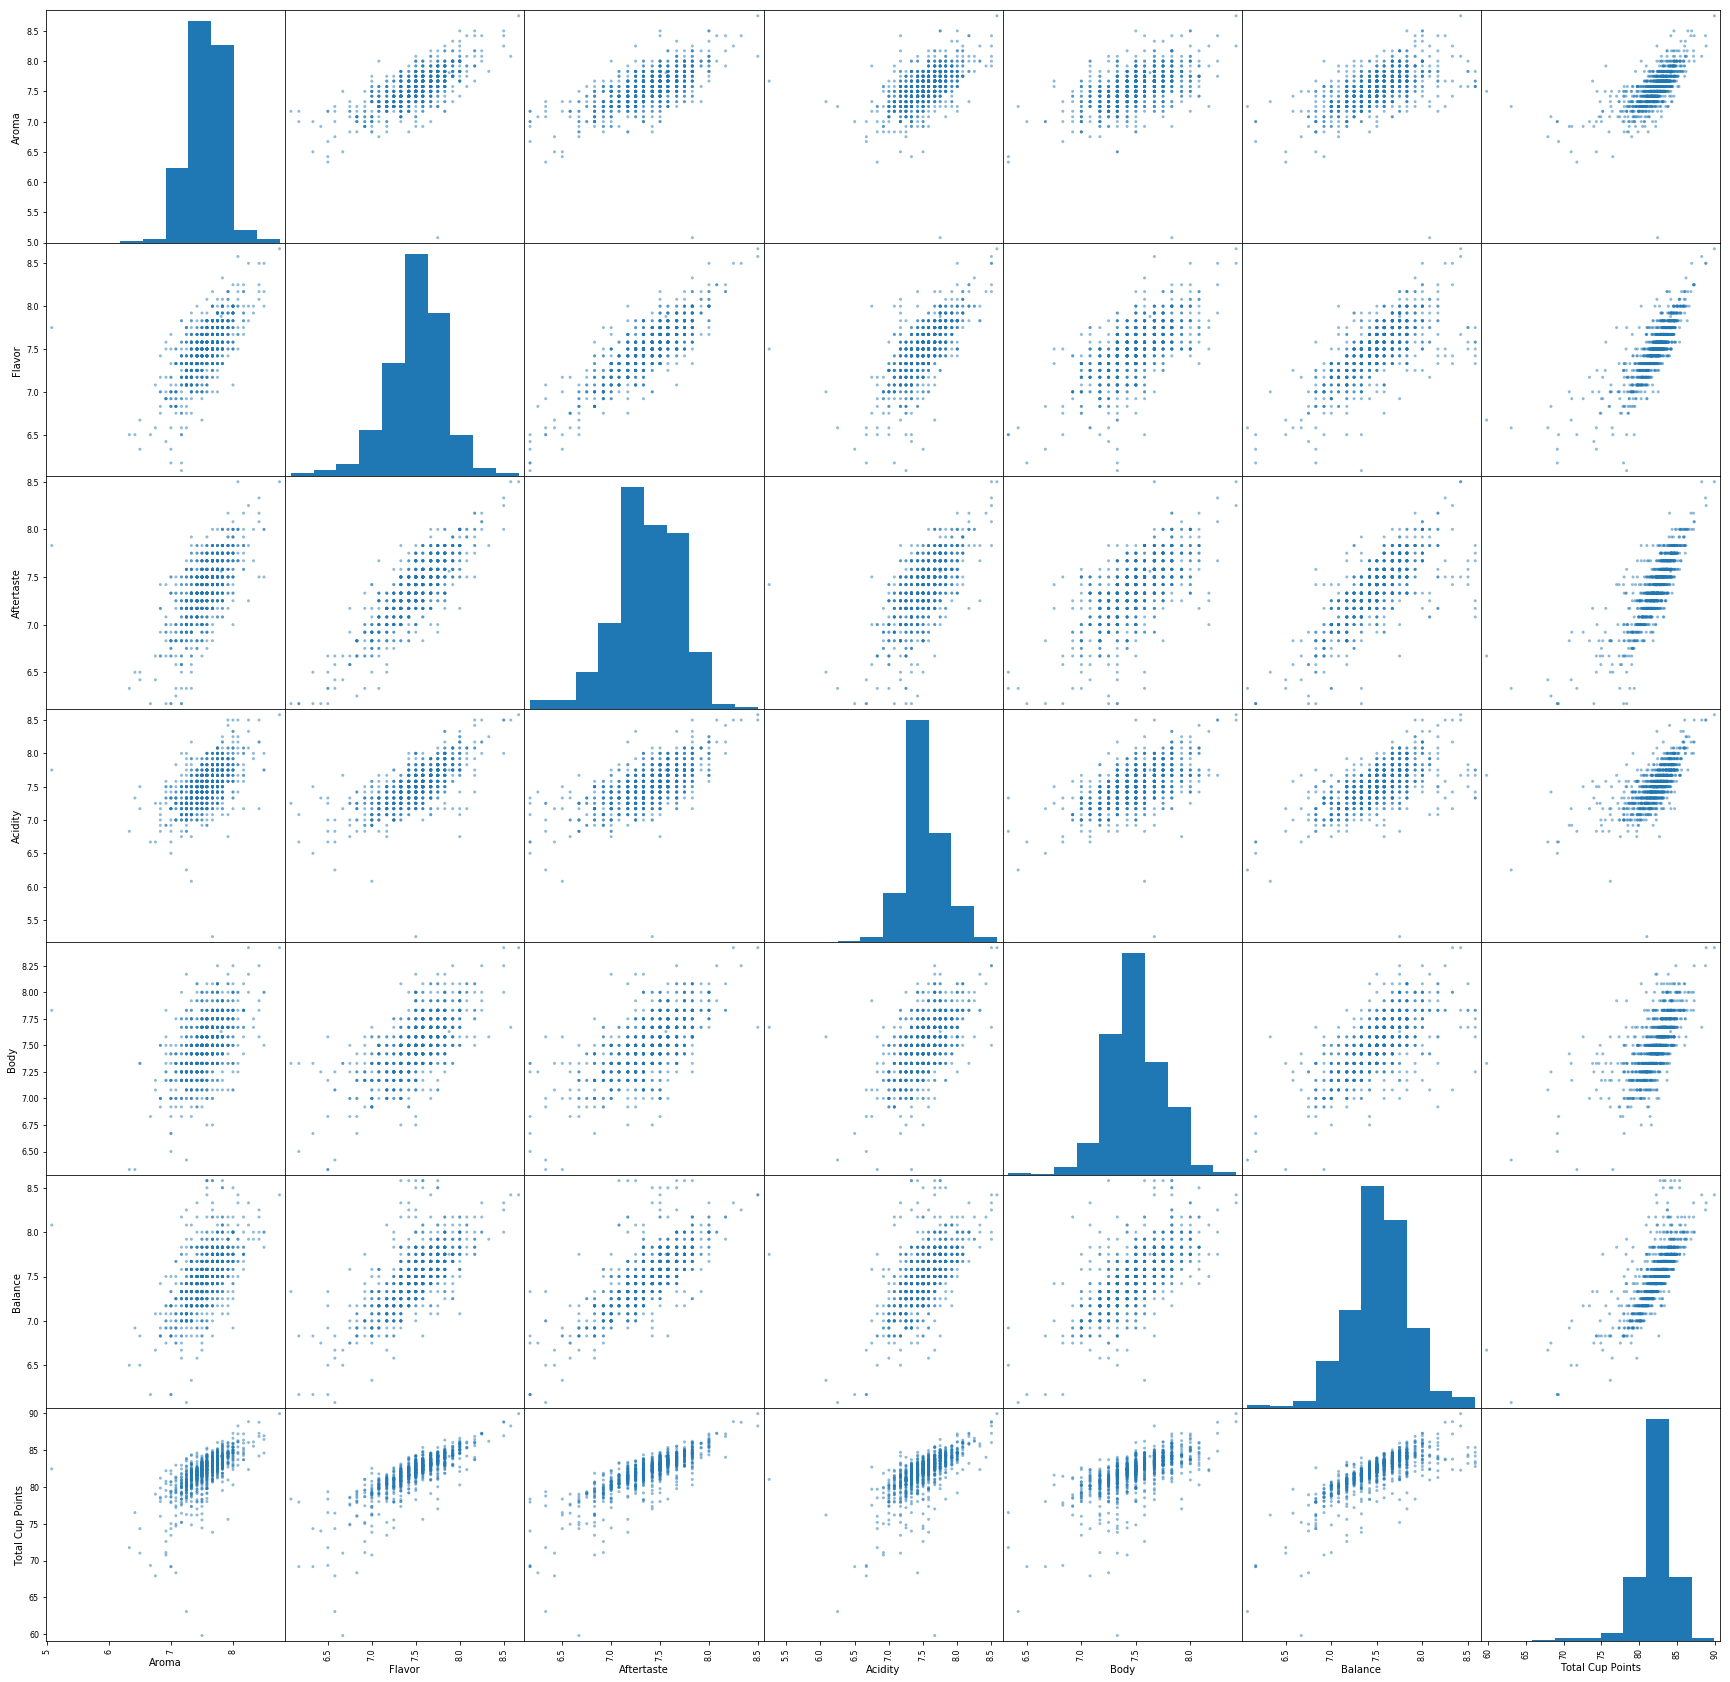

In [6]:
from pandas.plotting import scatter_matrix

coffee = coffee.drop(coffee.columns[0], axis = 1)

scatter_matrix(coffee, figsize = [30,30])

KMeans Clustering with 4 clusters to see how our different scalar fields(flavor, aroma) correlate with the different categories in our categorical data(Country of Origin, Color)
Results
Best Variety - Caturra and Other
Best Color - Green and Other
Best Processing Method - Semi-washed/Semi-pulped and Washed/Wet
Best Country - Mexico and Guatemala

As shown in our clusters above, what category the data point belongs to seems to indicate what kind of score the coffee bean will get in any particular scalar variable. For example, We can see that all of the points for individual countries are clustered together, indicating that the country of origin does have an impact on the total cup points and flavor of the bean.
Although our assumption regarding countries was correct, we did not expect the other categorical variables to be as closely clustered as we expected. It appears as if every categorical variable makes a difference, and coffee can be optimized to these categories.

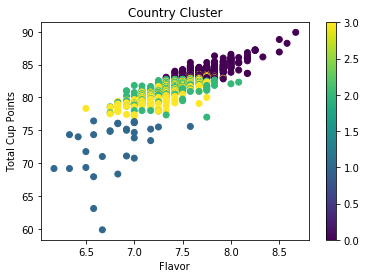

<Figure size 432x288 with 0 Axes>

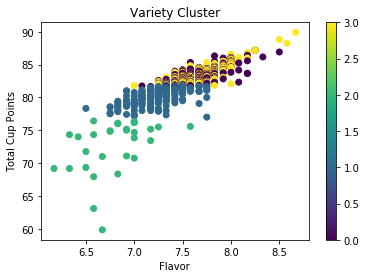

<Figure size 432x288 with 0 Axes>

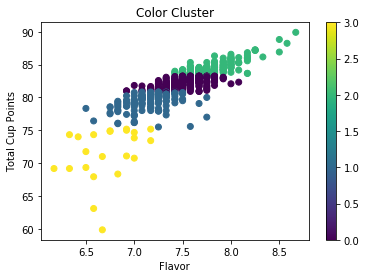

<Figure size 432x288 with 0 Axes>

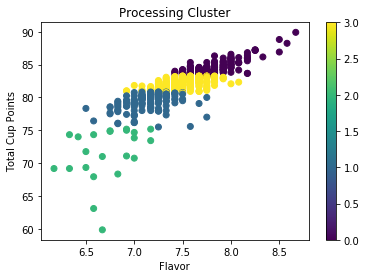

In [33]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, operator
from sklearn import cluster, metrics
coffee = pd.read_csv("arabica_data_cleaned.csv")
coffee = coffee.dropna()
count = {"Mexico" : "0", "Guatemala" : "1", "Columbia" : "2"}
variety = {"Caturra" : "3", "Bourbon" : "4", "Typica" : "5"}
process = {"Washed/Wet" : "6", "Natural/Day" : "7", "Semi-washed / Semi-pulped" : "8"}
color = {"Green" : "9", "Bluish-Green" : "10", "Blue-Green" : "11", "None" : "12"}
coffee = coffee.drop(coffee.columns[0], axis=1)
coffee = coffee.drop("Altitude", axis=1)
for i in coffee.index:
    coffee.loc[i, "Country of Origin"] = count.get(coffee["Country of Origin"].loc[i], "3")
    coffee.loc[i, "Variety"] = variety.get(coffee["Variety"].loc[i], "6")
    coffee.loc[i, "Processing Method"] = process.get(coffee["Processing Method"].loc[i], "9")
    coffee.loc[i, "Color"] = color.get(coffee["Color"].loc[i], "12")
clust = cluster.KMeans(n_clusters = 4)
#new is an example of what we would drop in order to fit for country of origin
new = coffee.drop(["Variety", "Color", "Processing Method"], axis = 1)
clust.fit(new)
pred = clust.predict(new)
keys = np.array(list(count.keys()))
new["predClust"] = pred

scatter = plt.scatter(coffee["Flavor"], new["Total Cup Points"], c = clust.labels_)
plt.title("Country Cluster")
plt.xlabel("Flavor")
plt.ylabel("Total Cup Points")
plt.colorbar(scatter)
plt.figure()


#variety example
new = coffee.drop(["Country of Origin", "Color", "Processing Method"], axis = 1)
clust.fit(new)
pred = clust.predict(new)
keys = np.array(list(count.keys()))
new["predClust"] = pred
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(coffee["Flavor"], new["Total Cup Points"], c = clust.labels_)
plt.title("Variety Cluster")
plt.xlabel("Flavor")
plt.ylabel("Total Cup Points")
plt.colorbar(scatter)
plt.figure()

#Color example
new = coffee.drop(["Country of Origin", "Variety", "Processing Method"], axis = 1)
clust.fit(new)
pred = clust.predict(new)
keys = np.array(list(count.keys()))
new["predClust"] = pred
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(coffee["Flavor"], new["Total Cup Points"], c = clust.labels_)
plt.title("Color Cluster")
plt.xlabel("Flavor")
plt.ylabel("Total Cup Points")
plt.colorbar(scatter)
plt.figure()

#Processing example
new = coffee.drop(["Country of Origin", "Color", "Variety"], axis = 1)
clust.fit(new)
pred = clust.predict(new)
keys = np.array(list(count.keys()))
new["predClust"] = pred
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(coffee["Flavor"], new["Total Cup Points"], c = clust.labels_)
plt.title("Processing Cluster")
plt.xlabel("Flavor")
plt.ylabel("Total Cup Points")
plt.colorbar(scatter)

Interpretation/Discussion:

As can be seen from our clustering methods, it is possible to see differences between our categories, and to even decide which category would be better according to our variables. 

For our example from the poster, We can look at our Countries of Origin. It is plain to see that points of one color clustering together at a lower value than those of another color can show the difference between these two countries. The country with points at the higher end of the scale could be said to have better coffee beans than those at the lower end of the scale. This is the interpretation that we have come up with after seeing the visualizations. This supports what we originally had assumed, as looking at a well distributed source of data and a skewed number of categories would suggest that those categories could be looked at separately to determine their qualities. This was proven right for all of our categorical variables. 

Limitations/Expansion:

Firstly, our dataset is limited by the fact that we are only looking at one species of bean, 
Arabica. There is not data for other species of bean to compare against Arabica, so to further expand on this study we would look to trying to get data on other Coffee bean species to see if the same patterns are reflected there.

Another limitation of this dataset is that it is based on opinion, by the coffee bean reviewers that are creating the data. Opinionated data could skew the legitimacy of the data, especially as we do not know how many different reviewers contributed to the dataset. To further the study in this way, it would help to gain data on the reviewers themselves to prove the legitimacy of the dataset 